# Assignment 4.1

Name:  Parker Christenson  

Date: 09/28/2023


For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem # 4.1.

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 100$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 100,000 samples of size
100 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 100,000
estimates with the theoretical standard error of $\bar{Y}$.

`Your answer goes here`

In [17]:
import numpy as np

sample_size = 100
num_samples = 100000
q_avg_list = []
y_bar_list = []

for _ in range(num_samples):
    sample = np.random.normal(0, 1, sample_size)
    q1, q3 = np.percentile(sample, [25, 75])
    q_avg = (q1 + q3) / 2
    y_bar = np.mean(sample)
    
    q_avg_list.append(q_avg)
    y_bar_list.append(y_bar)

std_q_avg = np.std(q_avg_list)
std_y_bar = np.std(y_bar_list)

std_q_avg, std_y_bar

(0.11046682152299243, 0.09992346297065417)

## Problem # 4.2.

For a sequence of observations of a binary random variable, you observe the geometric random
variable (Section 2.2.2) outcome of the first success on observation number $y = 3$. Find and plot
the likelihood function.

`our answer goes here`

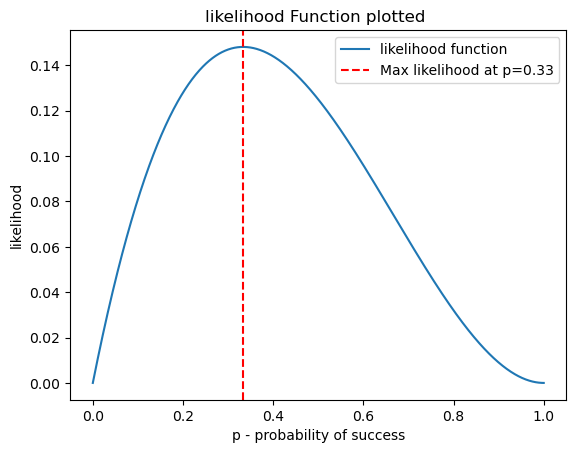

In [18]:
import matplotlib.pyplot as plt

# def likelihood funct 
def likelihood(p):
    return (1 - p)**2 * p

# generating 1000 vals between 0 and 1
p_values = np.linspace(0, 1, 1000)

# calc for each P val
likelihood_values = likelihood(p_values)

# plotting the likelihood function
plt.plot(p_values, likelihood_values, label='likelihood function')
plt.xlabel('p - probability of success')
plt.ylabel('likelihood')
plt.title('likelihood Function plotted ')
plt.axvline(x=p_values[np.argmax(likelihood_values)], linestyle='--', color='r', label=f'Max likelihood at p={p_values[np.argmax(likelihood_values)]:.2f}')
plt.legend()
plt.show()


## Problem # 4.4.

For the `Students` data file (Exercise 1.2 in Chapter 1) and corresponding population, find the
ML estimate of the population proportion believing in life after death. Construct a Wald 95%
confidence interval, using its formula (4.8). Interpret.

`Your answer goes here`

# PLEASE LET ME KNOW IF I USED THE RIGHT COLUMN, I WAS UNSURE ABOUT THE COLUMN NAMES SO I USED INFRENCE, AND ITS A BINARY VARIABLE SO I USED LIFE COLUMN

In [19]:
import pandas as pd
import math 
students_data = pd.read_csv(r'C:\Users\user\Desktop\School\MSAAI_500\Assignments\Assignment_4\Students_data.csv')

n = len(students_data)
affirm_count = students_data['affirm'].sum()  # Assuming 1 for belief in afterlife, 0 for no belief
p_hat = affirm_count / n

# z-val for confidence lvl 
z = 1.96

# calc standard error
se = math.sqrt((p_hat * (1 - p_hat)) / n)

# margin of error calc 
me = z * se

# Calc confidence int. 
lower_limit = p_hat - me
upper_limit = p_hat + me

# print statements 
print(f'ML Estimate of the population proportion: {p_hat}')
print(f'Wald 95% Confidence Interval: ({lower_limit}, {upper_limit})')

ML Estimate of the population proportion: 0.7166666666666667
Wald 95% Confidence Interval: (0.6026448688805838, 0.8306884644527496)


#### Interpretation:

The ML estimate is the best estimate of the true population of the Students believing in life after death. 

The Walk 95% confidence interval is the range of values that we are 95% confident contains the true population proportion of Students believing in life after death, thus bringing us to the conclusion is able to give us a hint in belief and disbelief in life after death.

## Problem # 4.5. 

The General Social Survey has asked respondents, “Do you think the use of marijuana should
be made legal or not?” View results at the most recent cumulative datafile at sda.berkeley.edu/archive.htm by entering the variables GRASS and YEAR.

(a) Describe any trend you see since 1973 in the percentage favoring legalization.   
(b) In the 2018 survey, 938 of 1447 were in favor of legalization. Use a Wald or score confidence
interval to determine if this provides sufficient evidence to conclude whether a majority
or a minority of the population support legalization.

`(a) Your answer goes here`

# YOU ALSO NEED TO TYPE AN ANSWER HERE DUMMY 

`(b) Your answer goes here`

In [20]:
import scipy.stats as st

# vals
sample_size = 1447
number_in_favor = 938
confidence_level = 0.95

# calc the sample proprtion 
p_hat = number_in_favor / sample_size

# finding the z val for the confidence level
z_value = st.norm.ppf(1 - (1 - confidence_level) / 2)

# margin of error calc
margin_of_error = z_value * ((p_hat * (1 - p_hat)) / sample_size) ** 0.5

# calc the lower and upper limits 
lower_limit = p_hat - margin_of_error
upper_limit = p_hat + margin_of_error

lower_limit, upper_limit

(0.6236337396799047, 0.6728417268024728)

## Problem # 4.7.

A social scientist wanted to estimate the proportion of school children in Boston who live in
a single-parent family. She decided to use a sample size such that, with probability 0.95, the
error would not exceed 0.05. How large a sample size should she use, if she has no idea of the
size of that proportion?

`Your answer goes here`

When we need to determine the sample size, $n$, for estimating a population proportion with a specified margin of error, $E$, we use the following formula:

$$ n = \left( \frac{Z^2 \cdot p \cdot (1-p)}{E^2} \right) $$

Here:
- $Z$ represents the Z-score corresponding to the confidence level.
- $p$ represents the estimated proportion of the population.
- $E$ is the margin of error, given as 0.05 in this instance.

Since the scientist has zero prior knowledge of the proportion, we use $p = 0.5$ and a margin of error of $E = 0.05$. Putthing these into the formula along with Z value for a 95% confidence interval which is $Z = 1.96$, gives us the equation:

$$ n = \left( \frac{(1.96)^2 \cdot 0.5 \cdot (1 - 0.5)}{(0.05)^2} \right) $$

The calculated sample size $n$, with 95% confidence, shows that the margin of error will not exceed 0.05. This is done only if we have no clue about the prior proportion. 



## Problem # 4.11.

The observations on number of hours of daily TV watching for the 10 subjects in the 2018 GSS
who identified themselves as Islamic were 0, 0, 1, 1, 1, 2, 2, 3, 3, 4.

(a)  Construct and interpret a 95% confidence interval for the population mean.
(b)  Suppose the observation of 4 was incorrectly recorded as 24. What would you obtain for
the 95% confidence interval? What does this suggest about potential effects of outliers on
confidence intervals for means?

`(a) Your answer goes here`

#### observations:
$ \text{{observations}} = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]$

#### interpret a 95% confidence for the population mean.

To construct a 95% confidence interval for the population mean $ \mu $, we use the formula:

$$ \bar{x} \pm t \cdot \left( \frac{s}{\sqrt{n}} \right) $$

where:
- $ \bar{x} $ is the sample mean,
- $ t $ is the t-value from the t-distribution corresponding to the desired level of confidence and degrees of freedom $ \text{{df}} = n - 1 $,
- $ s $ is the sample standard deviation,
- $ n \$ is the sample size.


`(b) Your answer goes here`

#### (b) Impact of Outliers

To see the effect an outlier has on the population mean, we should change one of the numbers in the data set, to be an outlier, and by doing so, it creates a larger range for the data, and on top of that, it will pull the mean away from the "true center" so we can measure the effect of the Value. 

$$ \text{{modified observations}} = [0, 0, 1, 1, 1, 2, 2, 3, 3, 56] $$

Recalculating the 95% confidence interval for the population mean with this new set of observations using the same formula, and observe the effect of the outlier on the interval. It will illustrate how sensitive the mean is to extreme values, which in turn impacts the confidence interval.

#### Conclusion
After finding the confidence intervals for both cases, we should compare the intervals to see the effect of the outlier on our estimate of the population mean. A wider interval in the second case would suggest that outliers can effect our conclusions about the population mean.

### I am going to code this in python to show the way that the mean shifts with our outlier value 

In [22]:
import scipy.stats as stats

# vals and numpy array for the data
observations = np.array([0, 0, 1, 1, 1, 2, 2, 3, 3, 4])
modified_observations = observations.copy()
modified_observations[-1] = 56  # I AM MODIFYING THIS NUMBER RIGHT HERE

#calc the confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean - interval, mean + interval

# calc'ing the confident intervals 
ci_original = confidence_interval(observations)
ci_modified = confidence_interval(modified_observations)

ci_original, ci_modified

((0.7432147810625882, 2.6567852189374115),
 (-5.464849793452478, 19.264849793452477))

## Problem # 4.14.

Using the Students data file, for the corresponding population, construct a 95% confidence interval **(a)** for the mean weekly number of hours spent watching TV; **(b)** to compare females and
males on the mean weekly number of hours spent watching TV. In each case, state assumptions,
including the practical importance of each, and interpret results.

`Your answer goes here`

In [23]:
student_data = pd.read_csv(r'C:\Users\user\Desktop\School\MSAAI_500\Assignments\Assignment_4\Students_data.csv')

# (a) 95% Confidence Interval for mean weekly hours spent watching TV:
mean_hours = student_data['tv'].mean()
std_err = student_data['tv'].sem()
confidence_level = 0.95
ci = stats.t.interval(confidence_level, len(student_data['tv'])-1, loc=mean_hours, scale=std_err)

# (b) Female vs Male Hours 
female_hours = student_data[student_data['gender'] == 0]['tv']
male_hours = student_data[student_data['gender'] == 1]['tv']

t_stat, p_value = stats.ttest_ind(female_hours, male_hours)

print(f"95% Confidence Interval for mean hours: {ci}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

95% Confidence Interval for mean hours: (5.531394852302159, 9.001938481031175)
T-statistic: -0.8530983069283323, P-value: 0.3971141870196562


## Problem # 4.15.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017
of 1178 females said yes, and 703 of 945 males said *yes*. Construct 95% confidence intervals
for the population proportions of females and males that believe in life after death and for the
difference between them. Interpret.

`Your answer goes here`

# Confidence Intervals for Belief in Life After Death

In the 2018 General Social Survey, respondents were asked whether they believed in life after death. Out of 1178 females, 1017 said *yes*, and out of 945 males, 703 said *yes*. We aim to construct the 95% confidence intervals for the population proportions of females and males who believe in life after death, and for the difference between them.

## Confidence Interval for Proportions
The confidence interval for a proportion is calculated using the formula:
\$ \text{{Confidence Interval}} = p \pm z \times \sqrt{\frac{{p(1 - p)}}{{n}}} \$
- \$ p \$ is the sample proportion.
- \$ n \$ is the sample size.
- For a 95% confidence level, \$ z = 1.96 \$.

### Females
- Sample Proportion, $ p_f = \frac{{1017}}{{1178}} \approx 0.863 $
- Sample Size, $ n_f = 1178 $

Plugging in the values, we get:
$ \text{{CI}}_f = 0.863 \pm 1.96 \times \sqrt{\frac{{0.863 \times 0.137}}{{1178}}} $
$ \text{{CI}}_f = (0.8434, 0.8826) $

### Males
- Sample Proportion, $ p_m = \frac{{703}}{{945}} \approx 0.744 $
- Sample Size, $ n_m = 945 $

Plugging in the values, we get:
$ \text{{CI}}_m = 0.744 \pm 1.96 \times \sqrt{\frac{{0.744 \times 0.256}}{{945}}} $
$ \text{{CI}}_m = (0.7162, 0.7718) $

## Confidence Interval for Difference in Proportions
The confidence interval for the difference in proportions between two groups is given by:
$ \text{{CI}}_{\text{{diff}}} = (p_f - p_m) \pm z \times \sqrt{\frac{{p_f(1 - p_f)}}{{n_f}} + \frac{{p_m(1 - p_m)}}{{n_m}}} $

Plugging in the values, we get:
$ \text{{CI}}_{\text{{diff}}} = (0.863 - 0.744) \pm 1.96 \times \sqrt{\frac{{0.863 \times 0.137}}{{1178}} + \frac{{0.744 \times 0.256}}{{945}}} $
$ \text{{CI}}_{\text{{diff}}} = 0.119 \pm 1.96 \times \sqrt{0.000100 + 0.000201} $
$ \text{{CI}}_{\text{{diff}}} = (0.0851, 0.1529) $

## Interpretation

### Females
We are 95% confident that the proportion of females who believe in life after death is between 84.34% and 88.26%.

### Males
We are 95% confident that the proportion of males who believe in life after death is between 71.62% and 77.18%.

### Difference in Proportions
We are 95% confident that the difference in proportions between females and males who believe in life after death is between 8.51% and 15.29%. This suggests that, as per the data from the 2018 General Social Survey, females are more likely to believe in life after death compared to males.


## Problem # 4.23.

You want to estimate the proportion of students at your school who answer *yes* when asked
whether governments should do more to address global warming. In a random sample of 10
students, every student says *yes*. Give a point estimate of the probability that the next student
interviewed will answer *yes*, if you use **(a)** ML estimation, **(b)** Bayesian estimation with a
uniform prior distribution.

`Your answer goes here`

## Estimation of Students' Opinion on Governmental Intervention in Global Warming

## (a) Maximum Likelihood (ML) Estimation
The Maximum Likelihood estimate of the proportion $ p $ in a binomial distribution, where every student says $ Yes $, is the sample proportion:
$ \hat{p}_{ML} = \frac{\text{{Number of 'yes'}}}{\text{{Total Number of students}}} $

Given that all 10 students said *yes*:
$ \hat{p}_{ML} = \frac{10}{10} = 1 $

With the ML esimation is it saying that there is a $ 100\% $ chance that the next student interviewed will say $ Yes $ to the question.

## (b) Bayesian Estimation 

If we consider a uniform prior distribution, it's equivalent to a Beta distribution with parameters $ \alpha = 1 $ and $ \beta = 1 $. The posterior distribution Formula $ \text{{Beta}}(\alpha + \text{{Number of 'YES'}}, \beta + \text{{Number of 'NO'}}) $.

Given that all 10 students said $YES$:
$$ \text{{Posterior}} = \text{{Beta}}(1 + 10, 1 + 0) = \text{{Beta}}(11, 1) $$

We can use the point estimate for $ p $ using Bayesian estimation with a uniform prior and we can get the mean of the posterior distribution. 
$ \text{{Mean}} = \frac{\alpha}{\alpha + \beta} $

Plugging in the val, we get:
$ \text{{Mean}} = \frac{11}{11 + 1} = \frac{11}{12} \approx 0.917 $

### Interpretation:
The Bayesian estimation, with a uniform prior, suggests that there is approximately a $ 91.7\% $ chance that the next student interviewed will say $ YES $  to the question, adjusting the ML estimate based on the belief that every possible proportion was equally likely.

## Summary
- The ML estimation provides an estimate of $ 100\% $ for the probability that the next student will say $ YES $ .
- The Bayesian estimation, assuming a uniform prior, gives a slightly lower point estimate $ 91.7\% $.

When Using the ML Estimation, there is a 100% Chance the Students at the school will say yes that the government should do something about global warming. But when the Bayesian Estimation is used, there is a 91.7% chance that the students will say yes to the same question. The ML Estimation is less accurate in my eyes, because it is not taking into account the overall size of the class which could be 1,000 students, and the 10 students that were asked could be the only 10 students that believe that the government should do something about global warming. The Bayesian Estimation is more accurate because it is taking into account the implying that there are more than just the sample size of the class, and the 10 students that were asked are a very small sample size of the overall class.


## Problem # 4.31.

The `Houses` data file at the book’s website lists, for 100 home sales in Gainesville, Florida,
several variables, including the selling price in thousands of dollars and whether the house
is new (1 = yes, 0 = no). Prepare a short report in which, stating all assumptions including
the relative importance of each, you conduct descriptive and inferential statistical analyses to
compare the selling prices for new and older homes.

`Your answer goes here`

In [24]:
house_data = pd.read_csv(r'C:\Users\user\Desktop\School\MSAAI_500\Assignments\Assignment_4\House_Data.csv')

# Can you please Let me know if this the wrong data set? I beleive this is the correct one. I used excel Power Query to CSV 
house_data.head()


,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4.0,2
1,2,219.75,912,0,1173,2.0,1
2,3,356.55,1654,0,3076,4.0,2
3,4,300.00,2068,0,1608,3.0,2
4,5,239.85,1477,0,1454,3.0,3


In [25]:
grouped = house_data.groupby('new')['price']  
summary = pd.DataFrame()
summary['mean'] = grouped.mean()
summary['median'] = grouped.median()
summary['mode'] = grouped.apply(lambda x: x.mode()[0] if not x.mode().empty else None)
summary['range'] = grouped.apply(lambda x: x.max() - x.min())
summary['Q1'] = grouped.quantile(0.25)
summary['Q2'] = grouped.quantile(0.50)
summary['Q3'] = grouped.quantile(0.75)

print(summary)


           mean  median    mode  range      Q1     Q2       Q3
new                                                           
0    207.851124   190.8  127.50  849.0  135.00  190.8  240.000
1    436.445455   427.5  158.85  707.4  256.95  427.5  519.675


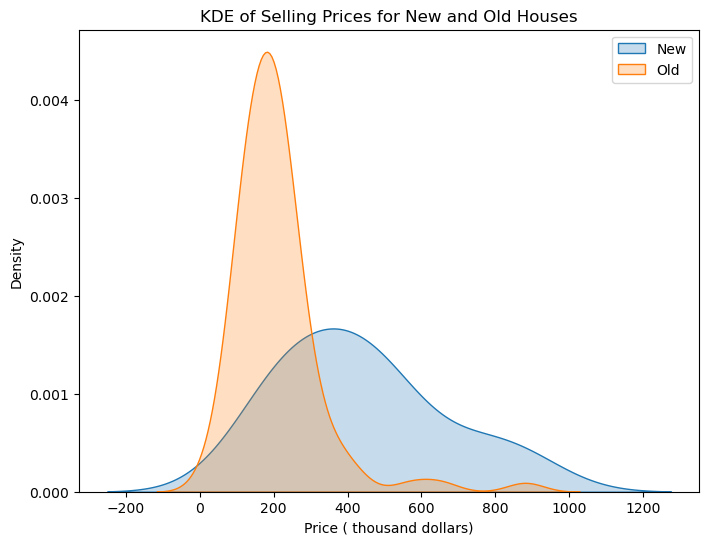

In [26]:
import seaborn as sns

plt.figure(figsize=(8, 6))

# KDE's for the old and new houses 
sns.kdeplot(house_data[house_data['new'] == 1]['price'], label='New', fill= 'True')
sns.kdeplot(house_data[house_data['new'] == 0]['price'], label='Old', fill= 'True')

plt.title('KDE of Selling Prices for New and Old Houses')
plt.xlabel('Price ( thousand dollars)')
plt.ylabel('Density')
plt.legend()
plt.show()


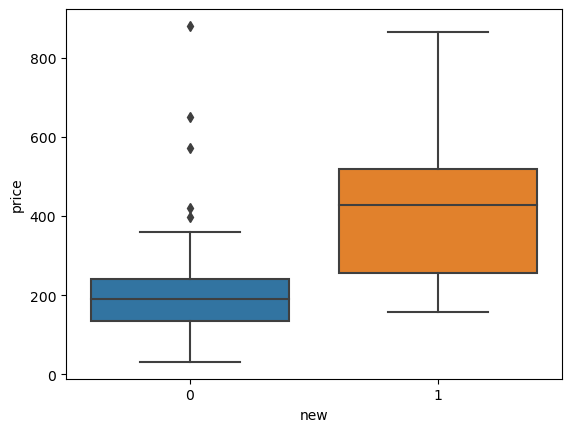

In [27]:
sns.boxplot(x='new', y='price', data=house_data)
plt.show()


In [28]:
new_prices = house_data[house_data['new'] == 1]['price']
old_prices = house_data[house_data['new'] == 0]['price']

t_stat, p_value = stats.ttest_ind(new_prices, old_prices)
print("t-stat:", t_stat)
print("p-value:", p_value)


t-stat: 5.318337988759298
p-value: 6.607877256848612e-07


## Summary of Stats for New and Old Homes


### T stat and P val Analysis 
Null Hypothesis: There is no difference in the mean selling prices between new and old homes.
Alternative Hypothesis: There is a difference in the mean selling prices between new and old homes.

With the extremely low p-value, we are able to reject the null hypothesis and conclude that there is a significant difference in the selling prices of new and old homes. The positive t-stat of 5.32 tells us that the mean selling price of new homes is higher than that of old homes.

### Summary Data frame Explination 

#### Old Houses
Mean: $207.85K: The average selling price of old houses is approximately $207,851.

Median (Q2): $190.8K: 50% of old houses sold for less than $190,800 and 50% sold for more.

Mode: $127.5K: $127,500 is the most frequent selling price among old houses.

Range: $849K: The difference between the highest and the lowest selling price of old houses is $849,000.

Q1: $135K: 25% of old houses sold for less than $135,000.

Q3: $240K: 75% of old houses sold for less than $240,000.


#### New houses 
Mean: $436.45K The average selling price of new houses is approximately $436,445.

Median (Q2): $427.5K: 50% of new houses sold for less than $427,500 and 50% sold for more.

Mode: $158.85K: $158,850 is the most frequent selling price among new houses.

Range: $707.4K: The difference between the highest and the lowest selling price of new houses is $707,400.

Q1: $256.95K: 25% of new houses sold for less than $256,950.

Q3: $519.68K: 75% of new houses sold for less than $519,675.

### Comparisons

The mean and median are both higher for new houses compared to old ones, showing us that new houses are going to be more times than not more expensive than a used home.

For both new and old houses the mean is higher than the median giving a right-skewed distribution with some houses sold at significantly higher prices.

The Range for older houses has a higher spread, which means that it has a larger variance in price, and possibily options that you can get with the home purchase.

The mode is a lot lower than the mean and median in both of the groups. Letting us infrence that there are some houses sold at much lower prices. 

For the Quartiles, The Q1 and Q3 for new houses are significantly higher than those for old houses, median prices are also higher for new houses. This shows us on average that the new houses are more expensive than old houses.

